In [1]:
%load_ext autoreload
%autoreload 2
import cv2
import os
from utils.face_analyzer import FaceAnalyzer

face_analyzer = FaceAnalyzer()
participant_number = 3
frames = face_analyzer.get_video_frames_for_participant(participant_number,num_selected_frames= 20, is_consecutive_frames=True)

I0000 00:00:1740993283.740687 4051847 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1740993283.758545 4052440 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740993283.764874 4052444 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [ ]:
from utils.prosody_analyzer import ProsodyAnalyzer


prosody_analyzer = ProsodyAnalyzer(participant_number)
prosodic_features = prosody_analyzer.extract_all_features()


ProsodicFeatures(f0_mean=124.07312436996503, f0_min=50.0, f0_max=501.1363636363636, f0_range=451.1363636363636, f0_sd=80.66165811209092, intensity_mean=-72.07918548583984, intensity_min=-80.0, intensity_max=3.814697265625e-06, intensity_range=80.0, intensity_sd=10.84933853149414, f1_mean=nan, f1_sd=nan, f2_mean=nan, f2_sd=nan, f3_mean=nan, f3_sd=nan, f2_f1_mean=0.0, f3_f1_mean=0.0, f2_f1_sd=0.0, f3_f1_sd=0.0, jitter=0.041181263830585325, shimmer=0.2066941187638602, percent_unvoiced=1.583185478367681, percent_breaks=99.9999999999569, max_pause_duration=6.240000000000007, avg_pause_duration=0.3424137931034484, duration=439.648)


# Facial Landmarks

In [49]:
for frame in frames:
    detected_faces_landmarks = face_analyzer.process_image_results(frame.image)
    frame.facial_landmarks_obj= face_analyzer.get_largest_face_landmarks_obj(frame.image, detected_faces_landmarks)
    if frame.facial_landmarks_obj:
        frame.facial_landmarks = frame.facial_landmarks_obj.landmark

W0000 00:00:1741001837.744297 4052440 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


# Face

In [50]:

for frame in frames:
    if frame.facial_landmarks:
        frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks, frame.image)

# Smile

In [51]:
import numpy as np


SMOOTH_WINDOW = 5
happiness_buffer = []
def smooth_happiness(happiness_prob):
    if happiness_prob is None:
        return 0 # TODO: change?
    happiness_buffer.append(happiness_prob)
    if len(happiness_buffer) > SMOOTH_WINDOW:
        happiness_buffer.pop(0)
    return np.mean(happiness_buffer)


for i, frame in enumerate(frames):
    face_roi = face_analyzer.get_face_roi_image(frame.image, frame.face, expand_ratio=1.1)
    frame.smile = smooth_happiness(face_analyzer.get_smile_from_frame(face_roi))

# Selected Facial Features

In [52]:
for frame in frames:
    frame.selected_facial_landmarks = face_analyzer.get_selected_facial_landmarks(frame.facial_landmarks)

# Head Pose

In [53]:

texts = []
for frame in frames:
    result = face_analyzer.get_face_angles(frame.image, frame.facial_landmarks)
    frame.face_angles = result
    

# Display Frames

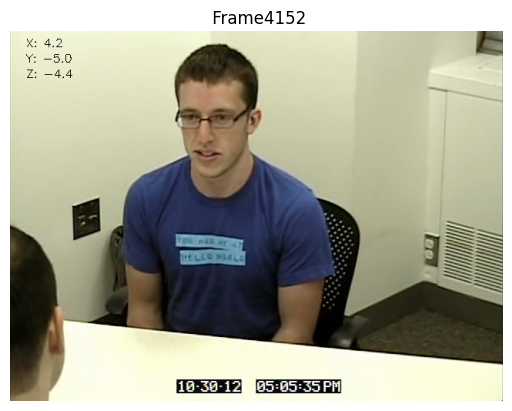

In [54]:
for frame in frames[::5]:
    frame.reset_drawable_image()
    # frame.draw_face()
    # frame.draw_smile()
    # frame.draw_selected_facial_landmarks(draw_lines=False)
    frame.put_face_angles()
    # frame.draw_facial_landmarks()
    if frame.smile >10 and frame.smile<20:
        frame.display()
